<a href="https://colab.research.google.com/github/Fedelberg/python_project/blob/main/covid_19_analysis_4th_3mtt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 Data Analysis: Exploring Trends, Vaccination Impact, and Insights Through Visualizations

The COVID-19 pandemic, caused by the SARS-CoV-2 virus, has significantly impacted global health, economies, and daily life. Since its emergence in late 2019, vast amounts of data have been collected on infection rates, mortality, vaccination efforts, and testing strategies. Analyzing this data is crucial for understanding the spread of the virus, identifying trends, and making informed policy decisions. This project involves basic data cleaning, exploratory data analysis (EDA), and visualization to uncover insights into COVID-19 cases, deaths, and vaccinations over time.

## About the Dataset

The **[dataset](https://drive.google.com/file/d/1syeD6Ni_ZlfXHHH0Jp6ALpvg9iCAEk_-/view?usp=sharing)** used for this project contains essential COVID-19 metrics, tracking the progression of the pandemic across different countries. The dataset consists of the following columns:

- DATE: The recorded date of COVID-19 data entry.
- country: The country or region where the cases, deaths, and vaccinations were reported.
- NEW Cases: The number of newly confirmed COVID-19 cases reported on a given date.
- NEW_DEATHS: The number of new deaths attributed to COVID-19 on that specific date.
- vaccinated: The number of people who have received at least one dose of the COVID-19 vaccine.

This dataset may require cleaning and preprocessing to handle missing values, incorrect formats, and inconsistencies before conducting meaningful analysis.

## Objective

The primary goal of this mini-project is to clean, analyze, and visualize COVID-19 data to identify trends, patterns, and key insights. The specific objectives include:

- Perform Data Cleaning: Handle missing values, standardize date formats, and filter out inconsistencies.
- Explore Trends in COVID-19 Cases and Deaths:
  - Analyze daily and cumulative trends in infections and fatalities.
  - Compare case and death rates across different countries and regions.
- Create Data Visualizations:
  - Line Plots: Show the trend of cases, deaths, and vaccinations over time.
  - Bar Charts: Compare cases, deaths, and vaccinations by country.
  - Scatter Plots: Explore relationships between infection rates and testing or vaccination rates.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import requests

url = 'https://drive.google.com/uc?export=download&id=1syeD6Ni_ZlfXHHH0Jp6ALpvg9iCAEk_-'
response = requests.get(url)

# Save the file to a temporary location
with open('covid_data.csv', 'wb') as f:
    f.write(response.content)

# Load the data into a pandas DataFrame
df = pd.read_csv('covid_data.csv')

display(df.head())

,DATE,country,NEW Cases,NEW_DEATHS,vaccinated
0,2024-11-01,Argentina,NaN,NaN,unknown
1,2024-11-01,Australia,0.0,0.0,327
2,2024-11-01,Australia,0.0,0.0,327
3,2024-11-01,Brazil,971.0,48.0,430
4,2024-11-01,Canada,176.0,8.0,unknown


In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         165 non-null    object 
 1   country      165 non-null    object 
 2    NEW Cases   154 non-null    float64
 3   NEW_DEATHS   139 non-null    float64
 4   vaccinated   165 non-null    object 
dtypes: float64(2), object(3)
memory usage: 6.6+ KB


In [ ]:
print(df.isnull().sum())

DATE            0
country         0
 NEW Cases     11
NEW_DEATHS     26
vaccinated      0
dtype: int64


**DATA CLEANING**

In [ ]:
# Handle missing values in NEW Cases column (replace with 0)
df[' NEW Cases'] = df[' NEW Cases'].fillna(0)

In [ ]:
# Handle missing values in NEW_DEATHS column (replace with 0)
df['NEW_DEATHS'] = df['NEW_DEATHS'].fillna(0)


In [ ]:
# Handle incorrect format in vaccinated column (replace 'unknown' with NaN and then with 0)
df['vaccinated '] = df['vaccinated '].replace('unknown', np.nan)
df['vaccinated '] = pd.to_numeric(df['vaccinated '], errors='coerce')
df['vaccinated '] = df['vaccinated '].fillna(0)

print(df)

          DATE    country    NEW Cases  NEW_DEATHS  vaccinated 
0    2024-11-01  Argentina         0.0         0.0          0.0
1    2024-11-01  Australia         0.0         0.0        327.0
2    2024-11-01  Australia         0.0         0.0        327.0
3    2024-11-01     Brazil       971.0        48.0        430.0
4    2024-11-01     Canada       176.0         8.0          0.0
..          ...        ...         ...         ...          ...
160  2024-11-30     Brazil       514.0        25.0          0.0
161  2024-11-30     Canada      1133.0        56.0        438.0
162  2024-11-30     Canada      1133.0        56.0        438.0
163  2024-11-30      China         0.0         0.0          0.0
164  2024-11-30      China         0.0         0.0          0.0

[165 rows x 5 columns]


In [ ]:
# Remove decimal points by rounding to the nearest integer for numeric columns
numeric_cols = [' NEW Cases', 'NEW_DEATHS', 'vaccinated ']
df[numeric_cols] = df[numeric_cols].round(0).astype(int)

In [ ]:
print(df)

          DATE    country    NEW Cases  NEW_DEATHS  vaccinated 
0    2024-11-01  Argentina           0           0            0
1    2024-11-01  Australia           0           0          327
2    2024-11-01  Australia           0           0          327
3    2024-11-01     Brazil         971          48          430
4    2024-11-01     Canada         176           8            0
..          ...        ...         ...         ...          ...
160  2024-11-30     Brazil         514          25            0
161  2024-11-30     Canada        1133          56          438
162  2024-11-30     Canada        1133          56          438
163  2024-11-30      China           0           0            0
164  2024-11-30      China           0           0            0

[165 rows x 5 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         165 non-null    object 
 1   country      165 non-null    object 
 2    NEW Cases   165 non-null    float64
 3   NEW_DEATHS   165 non-null    float64
 4   vaccinated   165 non-null    float64
dtypes: float64(3), object(2)
memory usage: 6.6+ KB


**EXPLORATORY DATA ANALYSIS AND VISUALIZATIONS**

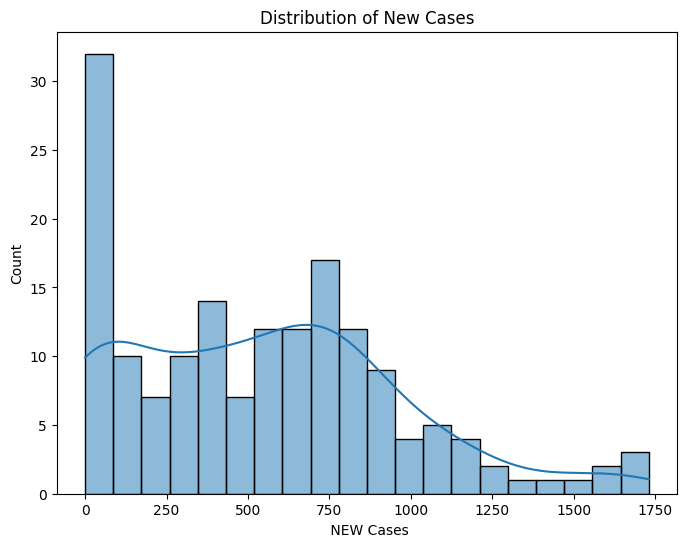

In [ ]:
#Distribution of NEW Cases
plt.figure(figsize=(8, 6))
sns.histplot(df[' NEW Cases'], bins=20, kde=True)
plt.title('Distribution of New Cases')
plt.show()

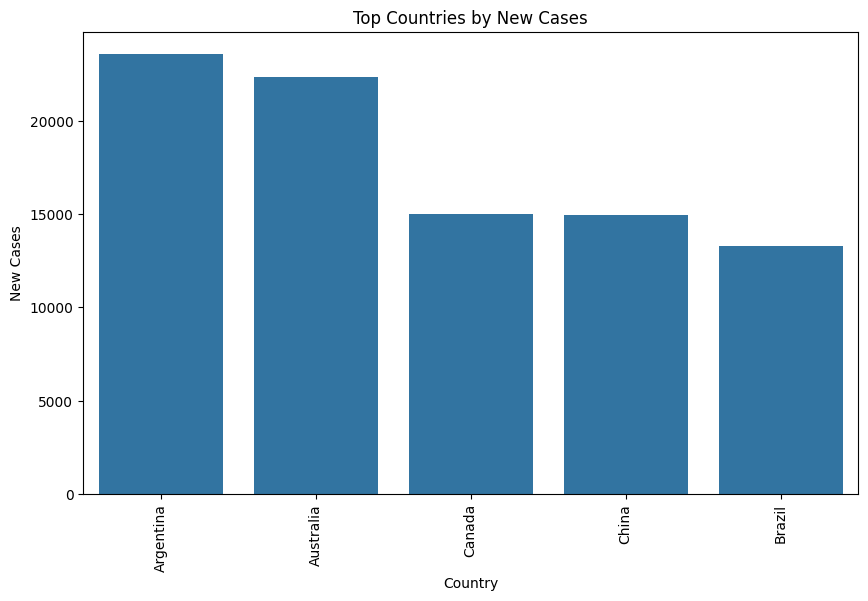

In [ ]:
#Top countries by NEW Cases
top_countries = df.groupby('country ')[' NEW Cases'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top Countries by New Cases')
plt.xlabel('Country')
plt.ylabel('New Cases')
plt.xticks(rotation=90)
plt.show()

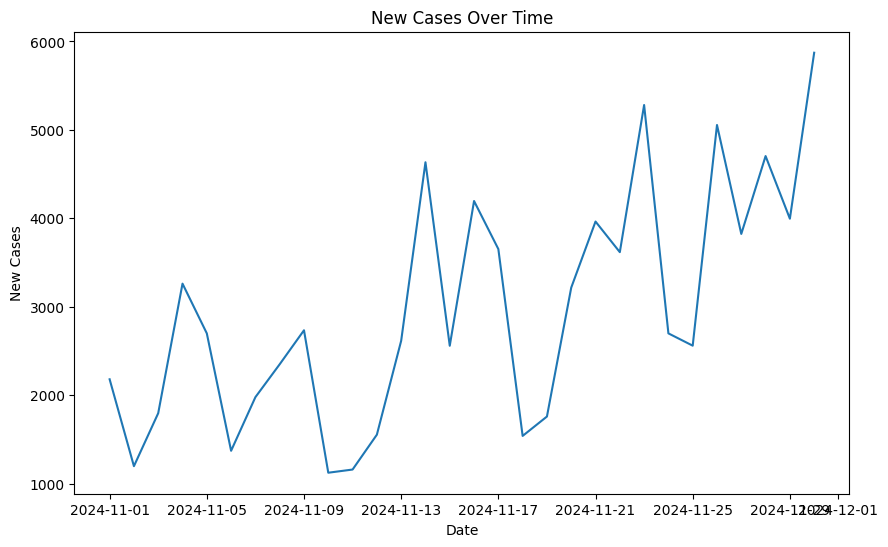

In [ ]:
#NEW Cases over time
df['DATE'] = pd.to_datetime(df['DATE '], format='mixed')
df_date = df.groupby('DATE')[' NEW Cases'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='DATE', y=' NEW Cases', data=df_date)
plt.title('New Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

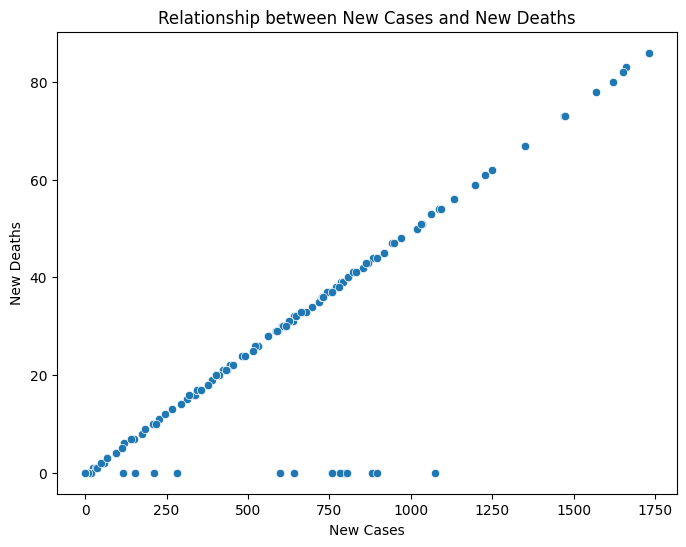

In [ ]:
#Relationship between NEW Cases and NEW_DEATHS
plt.figure(figsize=(8, 6))
sns.scatterplot(x=' NEW Cases', y='NEW_DEATHS', data=df)
plt.title('Relationship between New Cases and New Deaths')
plt.xlabel('New Cases')
plt.ylabel('New Deaths')
plt.show()

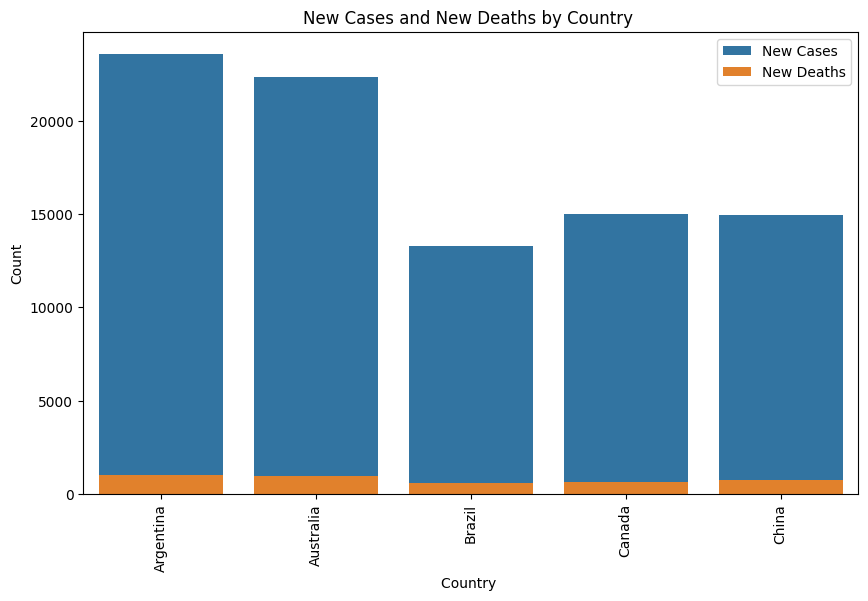

In [ ]:
#NEW Cases and NEW_DEATHS by country
df_country = df.groupby('country ')[[' NEW Cases', 'NEW_DEATHS']].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='country ', y=' NEW Cases', data=df_country, label='New Cases')
sns.barplot(x='country ', y='NEW_DEATHS', data=df_country, label='New Deaths')
plt.title('New Cases and New Deaths by Country ')
plt.xlabel('Country ')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Group by country and calculate the total vaccinated
vaccinated_by_country = df.groupby('country ')['vaccinated '].sum().reset_index()

# Sort the countries by total vaccinated in descending order
vaccinated_by_country = vaccinated_by_country.sort_values(by='vaccinated ', ascending=False)

# Get the most vaccinated country
most_vaccinated_country = vaccinated_by_country.iloc[0]

print(f"The most vaccinated country is {most_vaccinated_country['country ']} with a total of {most_vaccinated_country['vaccinated ']} vaccinated individuals.")


The most vaccinated country is Australia with a total of 13156 vaccinated individuals.


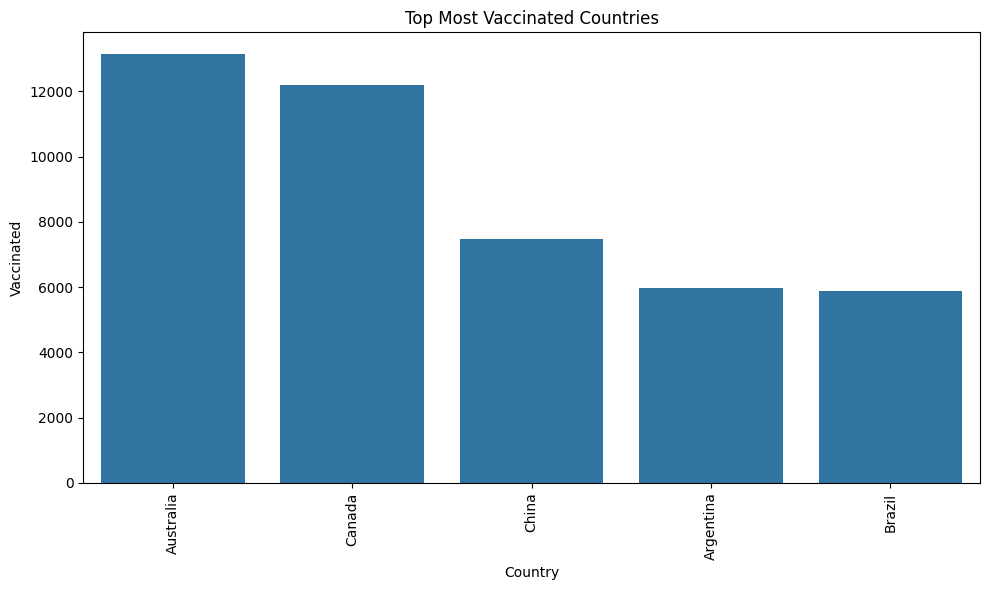

In [ ]:
# Get the top most vaccinated countries
top_vaccinated_countries = vaccinated_by_country.head()

# Plot the top most vaccinated countries
plt.figure(figsize=(10, 6))
sns.barplot(x='country ', y='vaccinated ', data=top_vaccinated_countries)
plt.title('Top Most Vaccinated Countries')
plt.xlabel('Country')
plt.ylabel('Vaccinated')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()